In [4]:
import numpy as np
import pandas as pd

# 设置随机种子以便结果可复现
np.random.seed(42)

# 定义数据集大小
n_samples = 1000

# 生成正态分布的特征数据
# 流大小 (Flow Size)
flow_size_benign = np.random.normal(loc=100, scale=50, size=int(n_samples/2))  # 良性流量的平均大小为100KB
flow_size_malicious = np.random.normal(loc=500, scale=100, size=int(n_samples/2))  # 恶意流量的平均大小为500KB

# 流持续时间 (Flow Duration)
flow_duration_benign = np.random.normal(loc=10, scale=3, size=int(n_samples/2))  # 良性流量平均持续时间为10秒
flow_duration_malicious = np.random.normal(loc=60, scale=15, size=int(n_samples/2))  # 恶意流量平均持续时间为60秒

# 目的地址聚集度 (Destination Address Concentration)
destination_concentration_benign = np.random.normal(loc=0.2, scale=0.05, size=int(n_samples/2))  # 良性流量聚集度
destination_concentration_malicious = np.random.normal(loc=0.8, scale=0.1, size=int(n_samples/2))  # 恶意流量聚集度

# 组合数据
data = np.concatenate([
    np.column_stack([flow_size_benign, flow_duration_benign, destination_concentration_benign, ['benign']*int(n_samples/2)]),
    np.column_stack([flow_size_malicious, flow_duration_malicious, destination_concentration_malicious, ['malicious']*int(n_samples/2)])
], axis=0)

# 打乱数据顺序
np.random.shuffle(data)

# 创建DataFrame
columns = ['Flow Size', 'Flow Duration', 'Destination Concentration', 'Label']
df = pd.DataFrame(data, columns=columns)

# 输出前几行数据
print(df.head())

# 如果需要保存数据到CSV文件
df.to_csv('network_traffic_data.csv', index=False)

            Flow Size       Flow Duration Destination Concentration      Label
0   520.8382807947553   72.00614287841523        0.9516394055253573  malicious
1    557.707212718054   45.02421841217563        0.6622382499245762  malicious
2   137.5966516343387  13.151963188022837       0.19044861186999157     benign
3   27.59578292513379   2.338236595294136        0.1760581271995798     benign
4  117.85077429825236  10.245488075642696       0.15847777967217175     benign


                           Flow Size  Flow Duration  Destination Concentration
Flow Size                   1.000000       0.856076                   0.906821
Flow Duration               0.856076       1.000000                   0.892128
Destination Concentration   0.906821       0.892128                   1.000000


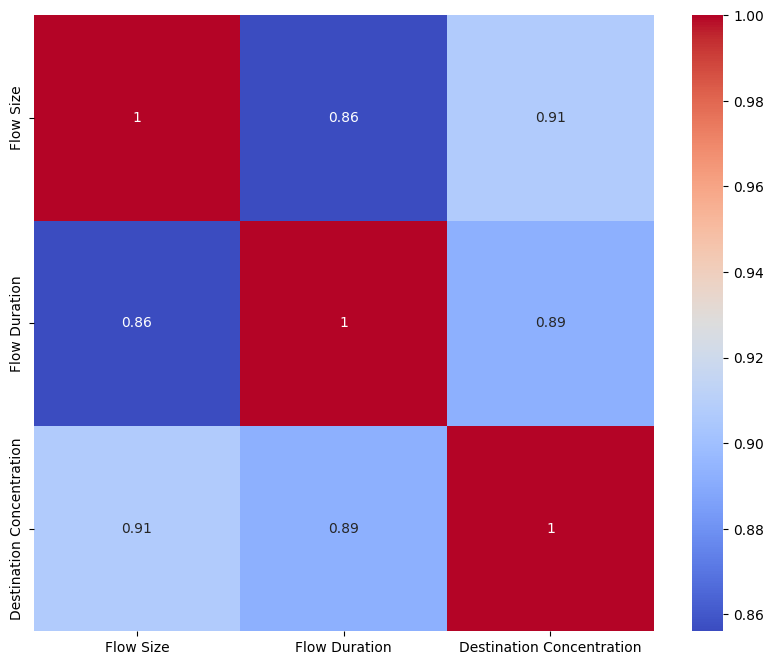

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设我们有一个名为 df 的 DataFrame 对象
df = pd.read_csv('network_traffic_data.csv') # 如果是从CSV文件加载数据的话

# 计算所有特征之间的皮尔逊相关系数
correlation_matrix = df.corr()

# 打印相关性矩阵
print(correlation_matrix)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

                           Flow Size  Flow Duration  Destination Concentration
Flow Size                   1.000000       0.478430                   0.512733
Flow Duration               0.478430       1.000000                   0.497109
Destination Concentration   0.512733       0.497109                   1.000000


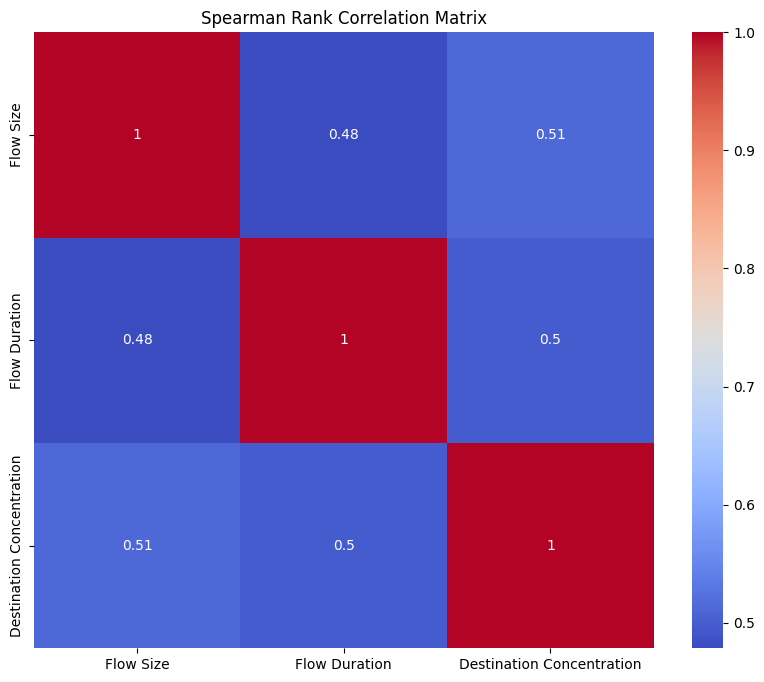

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设我们有一个名为 df 的 DataFrame 对象
# df = pd.read_csv('your_dataset.csv') # 如果是从CSV文件加载数据的话

# 计算所有特征之间的肯德尔等级相关系数
kendall_correlation_matrix = df.corr(method='kendall')

# 打印相关性矩阵
print(kendall_correlation_matrix)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Rank Correlation Matrix')
plt.show()